<a href="https://colab.research.google.com/github/sispo3314/AI_study/blob/main/WISDM/wisdm_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("/content/drive/MyDrive/datasets/WISDM_ar_v1.1_raw.txt", header=None, on_bad_lines='skip').dropna()


In [3]:
df

,0,1,2,3,4,5
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;
...,...,...,...,...,...,...
1086461,19,Sitting,131623331483000,9.000000,-1.570000,1.69;
1086462,19,Sitting,131623371431000,9.040000,-1.460000,1.73;
1086463,19,Sitting,131623411592000,9.080000,-1.380000,1.69;
1086464,19,Sitting,131623491487000,9.000000,-1.460000,1.73;


In [4]:
df.columns=['user', 'activity', 'timestamp', 'x','y','z']
df['z']=df['z'].str.replace(';', '')
df=df.drop(columns=['timestamp'])
df.head()

,user,activity,x,y,z
0,33,Jogging,-0.694638,12.680544,0.50395286
1,33,Jogging,5.012288,11.264028,0.95342433
2,33,Jogging,4.903325,10.882658,-0.08172209
3,33,Jogging,-0.612916,18.496431,3.0237172
4,33,Jogging,-1.184970,12.108489,7.205164


In [5]:
df.isnull().sum()

,0
user,0
activity,0
x,0
y,0
z,0


In [6]:
df['activity'].value_counts()

,count
activity,
Walking,418393
Jogging,336445
Upstairs,122869
Downstairs,100425
Sitting,59939
Standing,48394


In [7]:
#문자열->실수
df['x']=df['x'].astype(float)
df['y']=df['y'].astype(float)
df['z']=df['z'].astype(float)

In [8]:
#라벨 인코딩
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
df['activity']=label.fit_transform(df['activity'])
df.head()

,user,activity,x,y,z
0,33,1,-0.694638,12.680544,0.503953
1,33,1,5.012288,11.264028,0.953424
2,33,1,4.903325,10.882658,-0.081722
3,33,1,-0.612916,18.496431,3.023717
4,33,1,-1.184970,12.108489,7.205164


In [9]:
X=df.drop(columns=['activity'])
y=df['activity']
X

,user,x,y,z
0,33,-0.694638,12.680544,0.503953
1,33,5.012288,11.264028,0.953424
2,33,4.903325,10.882658,-0.081722
3,33,-0.612916,18.496431,3.023717
4,33,-1.184970,12.108489,7.205164
...,...,...,...,...
1086461,19,9.000000,-1.570000,1.690000
1086462,19,9.040000,-1.460000,1.730000
1086463,19,9.080000,-1.380000,1.690000
1086464,19,9.000000,-1.460000,1.730000


In [10]:
y

,activity
0,1
1,1
2,1
3,1
4,1
...,...
1086461,2
1086462,2
1086463,2
1086464,2


In [11]:
users=sorted(df['user'].unique())
print(users)

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36)]


In [12]:
#train, test, val 분리하기
train_users=[u for u in users if u<=28]
val_users=[u for u in users if 28<u<=32]
test_users=[u for u in users if u>32]

#사용자 그룹에 따라 DataFrame 생성
train_df=df[df['user'].isin(train_users)].copy()
val_df=df[df['user'].isin(val_users)].copy()
test_df=df[df['user'].isin(test_users)].copy()

print("-----사용자 기반 데이터 분할-----")
print(f"훈련용 사용자 수: {len(train_users)}명, 데이터 수: {len(train_df)}")
print(f"검증용 사용자 수: {len(val_users)}명, 데이터 수: {len(val_df)}")
print(f"테스트용 사용자 수: {len(test_users)}명, 데이터 수: {len(test_df)}")

-----사용자 기반 데이터 분할-----
훈련용 사용자 수: 28명, 데이터 수: 823043
검증용 사용자 수: 4명, 데이터 수: 143367
테스트용 사용자 수: 4명, 데이터 수: 120055


In [13]:
from sklearn.preprocessing import StandardScaler

features=['x','y','z']
scaler=StandardScaler()
scaler.fit(train_df[features])

train_df[features]=scaler.transform(train_df[features])
val_df[features]=scaler.transform(val_df[features])
test_df[features]=scaler.transform(test_df[features])

In [14]:
from scipy import stats
import numpy as np

In [15]:
def segments(df, time_steps, step, label_name):
  N_FEATURES=3
  segments=[]
  labels=[]
  for i in range(0, len(df)-time_steps, step):
    xs=df['x'].values[i:i+time_steps]
    ys=df['y'].values[i:i+time_steps]
    zs=df['z'].values[i:i+time_steps]

    win_labels=df[label_name].values[i:i+time_steps].astype(int)
    label = np.bincount(win_labels).argmax()
    segments.append([xs, ys, zs])
    labels.append(label)
  reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
  labels = np.asarray(labels)

  return reshaped_segments, labels

In [16]:
TIME_PERIOD=80
STEP_DISTANCE=40
LABEL='activity'


In [17]:
x_train, y_train=segments(train_df, TIME_PERIOD, STEP_DISTANCE, LABEL)
x_val, y_val=segments(val_df, TIME_PERIOD, STEP_DISTANCE, LABEL)
x_test, y_test=segments(test_df, TIME_PERIOD, STEP_DISTANCE, LABEL)

In [18]:
#원핫인코딩
from tensorflow.keras.utils import to_categorical

num_classes=label.classes_.size
y_train_hot=to_categorical(y_train, num_classes)
y_val_hot=to_categorical(y_val, num_classes)
y_test_hot=to_categorical(y_test, num_classes)

print("훈련데이터:", x_train.shape, y_train_hot.shape)
print("검증데이터", x_val.shape, y_val_hot.shape)

훈련데이터: (20575, 80, 3) (20575, 6)
검증데이터 (3583, 80, 3) (3583, 6)


In [19]:
x_train = x_train.reshape(x_train.shape[0], TIME_PERIOD, 3, 1)
x_val = x_val.reshape(x_val.shape[0], TIME_PERIOD, 3, 1)
x_test = x_test.reshape(x_test.shape[0], TIME_PERIOD, 3, 1)

In [20]:
x_train.shape, x_val.shape

((20575, 80, 3, 1), (3583, 80, 3, 1))

## ResNet 모델 구축

In [33]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, add, GlobalAveragePooling2D, Dense, Dropout

In [34]:
def residual_block(x, filters, kernel_size=(2,2), strides=(1,1)):
  #스킵연결을 위한 입력값 저장
  shortcut=x

  #합성곱 레이어
  y=Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
  y=BatchNormalization()(y)
  y=Activation('relu')(y)

  y=Conv2D(filters, kernel_size, padding='same')(y)
  y=BatchNormalization()(y)

  #입력과 출력의 차원이 다를 경우 shortcut의 차원 맞추기
  if strides!=(1,1) or x.shape[-1]!=filters:
    shortcut=Conv2D(filters, (1,1), strides=strides, padding='same')(shortcut)
    shortcut=BatchNormalization()(shortcut)

  #스킵연결 (입력+합성곱의 결과)
  res_output=add([shortcut,y])
  res_output=Activation('relu')(res_output)

  return res_output

In [52]:
#모델 입력 형태
input_shape=(TIME_PERIOD,3,1)
inputs=Input(shape=input_shape)

x=Conv2D(32, (3,3), padding="same", activation='relu', kernel_regularizer=l2(0.003))(inputs)
x=BatchNormalization()(x)

#잔차블록
x=residual_block(x, filters=32)
x=residual_block(x, filters=32)

#차원 줄이기
x=residual_block(x,filters=64,strides=(2,1))
x=residual_block(x,filters=64)

#분류레이어
x=GlobalAveragePooling2D()(x)
x=Dropout(0.5)(x)
outputs=Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.003))(x)

#모델
model=Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 80, 3, 1)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 80, 3, 32) │        320 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 3, 32) │        128 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 80, 3, 32) │      4,128 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 3, 32) │        128 │ conv2d_41[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_32       │ (None, 80, 3, 32) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 80, 3, 32) │      4,128 │ activation_32[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 3, 32) │        128 │ conv2d_42[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 80, 3, 32) │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_33       │ (None, 80, 3, 32) │          0 │ add_16[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 80, 3, 32) │      4,128 │ activation_33[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 3, 32) │        128 │ conv2d_43[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_34       │ (None, 80, 3, 32) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 80, 3, 32) │      4,128 │ activation_34[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 3, 32) │        128 │ conv2d_44[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_17 (Add)        │ (None, 80, 3, 32) │          0 │ activation_33[0]… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_35       │ (None, 80, 3, 32) │          0 │ add_17[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 40, 3, 64) │      8,256 │ activation_35[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 3, 64) │        256 │ conv2d_45[0][0] 

 Total params: 78,854 (308.02 KB)

 Trainable params: 77,894 (304.27 KB)

 Non-trainable params: 960 (3.75 KB)

In [53]:
#컴파일
from tensorflow.keras.optimizers import Adam

optimizer=Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
#클래스 가중치
from sklearn.utils import class_weight
import numpy as np
class_weights=class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict=dict(enumerate(class_weights))

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
history = model.fit(
    x_train, y_train_hot,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val_hot),
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)


Epoch 1/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.3693 - loss: 1.4377 - val_accuracy: 0.7162 - val_loss: 0.9192
Epoch 2/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6801 - loss: 0.7970 - val_accuracy: 0.7717 - val_loss: 0.6689
Epoch 3/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7795 - loss: 0.6307 - val_accuracy: 0.7873 - val_loss: 0.5381
Epoch 4/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8344 - loss: 0.5330 - val_accuracy: 0.7857 - val_loss: 0.5507
Epoch 5/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8568 - loss: 0.4559 - val_accuracy: 0.8099 - val_loss: 0.4994
Epoch 6/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8743 - loss: 0.4200 - val_accuracy: 0.8144 - val_loss: 0.4815
Epoch 7/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8956 - loss: 0.3708 - val_accuracy: 0.8141 - val_loss: 0.4680
Epoch 8/50
643/643 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8998 - loss: 0.3570 - val_accuracy: 

In [56]:
import matplotlib.pyplot as plt
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epochs_run = len(history.history['loss'])
  epoch_range = range(1, epochs_run+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

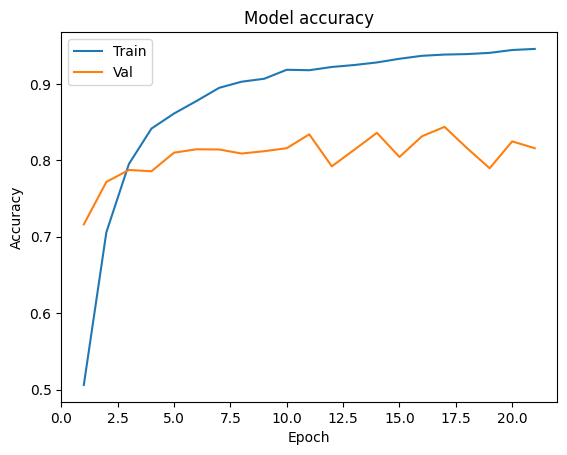

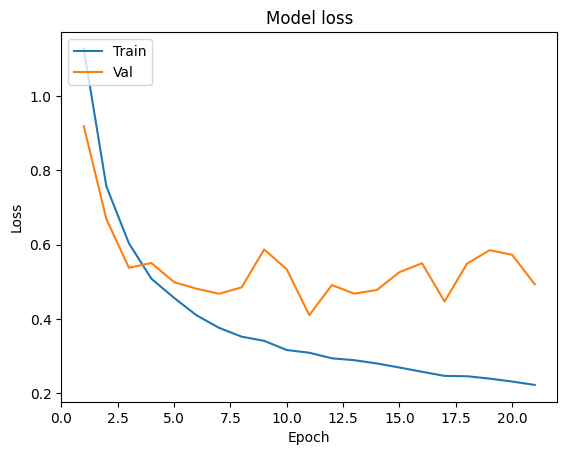

In [57]:
plot_learningCurve(history, 50)

In [58]:
loss, accuracy = model.evaluate(x_test, y_test_hot, verbose=0)
print("="*30)
print(f"테스트 데이터 정확도 (Accuracy): {accuracy:.4f}")
print(f"테스트 데이터 손실 (Loss): {loss:.4f}")
print("="*30)

테스트 데이터 정확도 (Accuracy): 0.8753
테스트 데이터 손실 (Loss): 0.4151


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


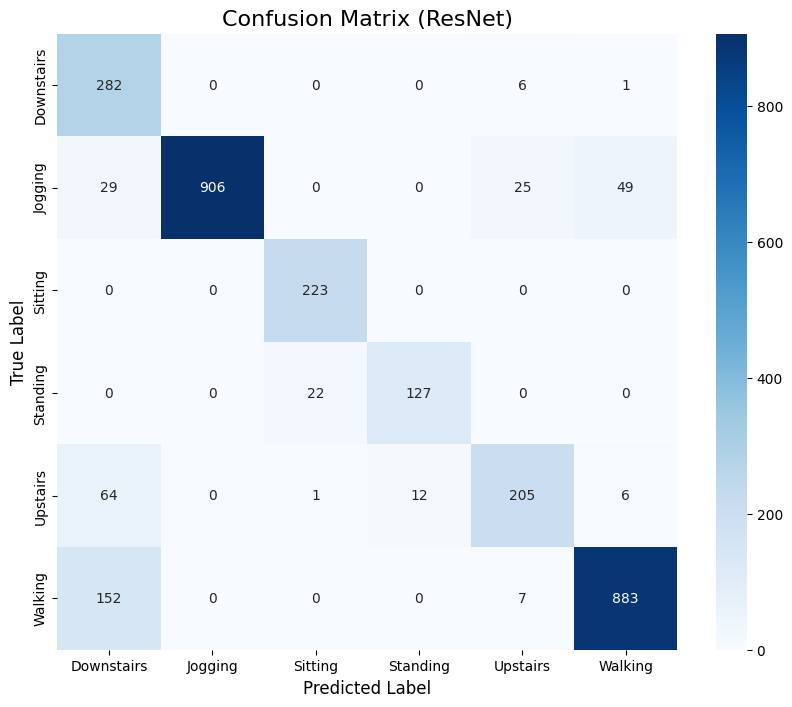

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label.classes_, yticklabels=label.classes_)
plt.title('Confusion Matrix (ResNet)', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()


In [60]:
print("\n===== 분류 리포트 (ResNet) =====")
print(classification_report(y_test, y_pred, target_names=label.classes_))


===== 분류 리포트 (ResNet) =====
              precision    recall  f1-score   support

  Downstairs       0.54      0.98      0.69       289
     Jogging       1.00      0.90      0.95      1009
     Sitting       0.91      1.00      0.95       223
    Standing       0.91      0.85      0.88       149
    Upstairs       0.84      0.71      0.77       288
     Walking       0.94      0.85      0.89      1042

    accuracy                           0.88      3000
   macro avg       0.86      0.88      0.86      3000
weighted avg       0.91      0.88      0.88      3000

